# 1. Building your Deep Neural Network - Step by Step

I basically followed https://github.com/Kulbear 's work on Andrew Ng's Deep Learning Specialization C1W4 homework assignment with some modification

## 1. Importing libraries and Setting up enviornments

In [1]:
# importing public libraries
import numpy as np
import matplotlib.pyplot as plt

import h5py

In [2]:
# setting up enviornments
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

%load_ext autoreload
%autoreload 2

In [3]:
# Importing User-defined Modules
from google.colab import drive
import sys

drive.mount('/content/gdrive')
sys.path.append('')
import testCases_v3/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Specialization/01 Neural Networks and Deep Learning/C1W4

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 2.General Methodology to Build Neural Network

1. Define neural network's architecture
2. Initialize parameters
3. Loop
- Compute NN's prediction (forward propagation)
- Compute loss 
- Compute gradients (backward propagation)
- Update parameters (gradient descent)

## 3 Initialize the parameters
3.1 Initialize the parameters for a two-layer network </br>



In [4]:
def initialize_parameters(n_x, n_h, n_y):
  """
  Argument:
  n_x -- size of the input layer
  n_h -- size of the hidden layer
  n_y -- size of the output layer
    
  Returns:
  parameters -- python dictionary containing your parameters:
                  W1 -- weight matrix of shape (n_h, n_x)
                  b1 -- bias vector of shape (n_h, 1)
                  W2 -- weight matrix of shape (n_y, n_h)
                  b2 -- bias vector of shape (n_y, 1)
  """  
  
  np.random.seed(1) # to make the result consistent
  W1 = np.random.randn(n_h, n_x) * 0.01
  b1 = np.zeros((n_h, 1))
  W2 = np.random.randn(n_y, n_h) * 0.01
  b2 = np.zeros((n_y, 1))

  parameters = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2,     
  }
  return parameters

In [5]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


### 3.2 Initialize the parameters for a $L$-layer neural network.

In [6]:
def initialize_parameters_deep(layer_dims):
  """
  Arguments:
  layer_dims -- python array (list) containing the dimensions of each layer in our network
    
  Returns:
  parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                bl -- bias vector of shape (layer_dims[l], 1)
  """  
  np.random.seed(3)
  L = len( layer_dims) - 1 # input layer are not counted as official layer
  parameters = {}

  for l in range(1, L+1, 1): # stop are excluded
    n_current = layer_dims[l]
    n_previous = layer_dims[l -1]
    parameters['W' + str(l)] = np.random.randn(n_current, n_previous) * 0.01
    parameters['b' + str(l)] = np.zeros((n_current, 1)) 

  return parameters

In [7]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


## 4 Forward Propagation
### 4.1 Linear Forward

In [8]:
def linear_forward (A_prev, W, b):
  """
  Implement the linear part of a layer's forward propagation.

  Arguments:
  A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
  W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
  b -- bias vector, numpy array of shape (size of the current layer, 1)

  Returns:
  Z -- the input of the activation function, also called pre-activation parameter 
  cache -- a python tuple containing "A_prev", "W" and "b" ; stored for computing the backward pass efficiently
  """

  Z = np.dot( W, A_prev) + b
  cache =  (A_prev, W, b)
  return Z, cache

In [9]:
A, W, b = testCases_v3.linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


### 4.2 Activation function
- sigmoid
- relu

In [10]:
def sigmoid(Z):
  """
  Implements the sigmoid activation in numpy

  Arguments:
  Z -- numpy array of any shape

  Returns:
  A -- output of sigmoid(z), same shape as Z
  cache -- returns Z as well, useful during backpropagation
  """
  A = 1 / ( 1 + np.exp(-Z))
  cache = Z
  return A, cache

In [11]:
def relu(Z):
  """
  Implement the RELU function.
  Arguments:
  Z -- Output of the linear layer, of any shape
  Returns:
  A -- Post-activation parameter, of the same shape as Z
  cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
  """  
  A = np.maximum(0, Z)
  cache = Z
  return A, cache

### 4.3 Linear-Activation Forward

In [12]:
def linear_activation_forward(A_prev, W, b, activation):
  """
  Implement the forward propagation for the LINEAR->ACTIVATION layer

  Arguments:
  A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
  W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
  b -- bias vector, numpy array of shape (size of the current layer, 1)
  activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

  Returns:
  A -- the output of the activation function, also called the post-activation value 
  cache -- a python dictionary containing "linear_cache" and "activation_cache";
            stored for computing the backward pass efficiently
  """
  Z, linear_cache = linear_forward(A_prev, W, b)

  if activation == 'relu':
    A, activation_cache = relu(Z)
  elif activation == 'sigmoid':
    A, activation_cache = sigmoid(Z)
  
  cache = (linear_cache, activation_cache)

  return A, cache

In [13]:
A_prev, W, b = testCases_v3.linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


### 4.4 L-layer Model

In [14]:
def L_model_forward(X, parameters):
  """
  Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

  Arguments:
  X -- data, numpy array of shape (input size, number of examples)
  parameters -- output of initialize_parameters_deep()

  Returns:
  AL -- last post-activation value
  caches -- list of caches containing:
              every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
              the cache of linear_sigmoid_forward() (there is one, indexed L-1)
  """

  caches = []
  L = len( parameters) // 2
  A_prev = X

  
  for l in range(1, L, 1):
    W = parameters['W' + str(l)]
    b = parameters['b' + str(l)]
    A, cache = linear_activation_forward( A_prev, W, b, 'relu' )
    caches.append(cache)
    A_prev = A

  W = parameters['W' + str(L)]
  b = parameters['b' + str(L)]
  AL, cache = linear_activation_forward( A_prev, W, b, 'sigmoid' )
  caches.append(cache)

  return AL, caches


In [15]:
X, parameters = testCases_v3.L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


## 5 Cost Function

In [16]:
def compute_cost(AL, Y):
  """
  Implement the cost function

  Arguments:
  AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
  Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

  Returns:
  cost -- cross-entropy cost
  """  
  m = Y.shape[1]

  logprob = np.multiply(Y, np.log(AL) ) + np.multiply(1 - Y, np.log(1- AL))
  cost = (-1 / m ) * np.sum(logprob, axis=1)
  cost = np.squeeze(cost)

  return cost 

In [17]:
Y, AL = testCases_v3.compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


## 6 Backward Propagation Module
### 6.1 - Linear backward

In [18]:
def linear_backward(dZ, cache):
  """
  Implement the linear portion of backward propagation for a single layer (layer l)

  Arguments:
  dZ -- Gradient of the cost with respect to the linear output (of current layer l)
  cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

  Returns:
  dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
  dW -- Gradient of the cost with respect to W (current layer l), same shape as W
  db -- Gradient of the cost with respect to b (current layer l), same shape as b
  """
  A_prev, W, b = cache
  m = dZ.shape[1]
  
  dA_prev = np.dot(W.T, dZ)
  dW = (1 / m) * np.dot(dZ, A_prev.T)
  db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

  return dA_prev, dW, db



In [19]:
# Set up some test inputs
dZ, linear_cache = testCases_v3.linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


## 6.2 Backpropagation of Activation
- sigmoid_backward
- relu backward

In [21]:
def sigmoid_backward(dA, cache):
  """
  Implement the backward propagation for a single SIGMOID unit.
  Arguments:
  dA -- post-activation gradient, of any shape
  cache -- 'Z' where we store for computing backward propagation efficiently
  Returns:
  dZ -- Gradient of the cost with respect to Z
  """
  Z = cache
  A = 1 / (1 + np.exp(-Z))
  dZ = dA * A * (1 - A)
  return dZ

In [23]:
def relu_backward(dA, cache):
  """
  Implement the backward propagation for a single RELU unit.
  Arguments:
  dA -- post-activation gradient, of any shape
  cache -- 'Z' where we store for computing backward propagation efficiently
  Returns:
  dZ -- Gradient of the cost with respect to Z
  """
  Z = cache
  dZ = np.copy(dA)
  dZ[Z <=0 ] = 0
  return dZ

### 6.3 Linear Activation Backward

In [25]:
def linear_activation_backward(dA, cache, activation):
  """
  Implement the backward propagation for the LINEAR->ACTIVATION layer.

  Arguments:
  dA -- post-activation gradient for current layer l 
  cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
  activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

  Returns:
  dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
  dW -- Gradient of the cost with respect to W (current layer l), same shape as W
  db -- Gradient of the cost with respect to b (current layer l), same shape as b
  """

  linear_cache, activation_cache = cache

  if activation == 'sigmoid':
    dZ = sigmoid_backward(dA, activation_cache)
  elif activation == 'relu':
    dZ = relu_backward(dA, activation_cache)
   
  dA_prev, dW, db = linear_backward(dZ, linear_cache)
  
  return dA_prev, dW, db
   

In [26]:
AL, linear_activation_cache =  testCases_v3.linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [37]:
def L_model_backward(AL, Y, caches):
  """
  Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

  Arguments:
  AL -- probability vector, output of the forward propagation (L_model_forward())
  Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
  caches -- list of caches containing:
              every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
              the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])

  Returns:
  grads -- A dictionary with the gradients
            grads["dA" + str(l)] = ... 
            grads["dW" + str(l)] = ...
            grads["db" + str(l)] = ... 
  """

  L = len(caches)
  m = Y.shape[1]
  cost = compute_cost(AL, Y)
  grads = {}

  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
  dA = dAL
  for l in range (L, 0, -1):
    current_cache = caches[l - 1]
    if l == L:
      dA_prev, dW, db  = linear_activation_backward(dA, current_cache, 'sigmoid')
    else:
      dA_prev, dW, db  = linear_activation_backward(dA, current_cache, 'relu')
    grads["dA" + str(l)] = dA_prev 
    grads["dW" + str(l)] = dW
    grads["db" + str(l)] = db
    dA = dA_prev
  
  return grads
 

In [39]:
def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA2"])) 
AL, Y_assess, caches = testCases_v3.L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)


dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


## 7 Update Parameters


In [51]:
def update_parameters(parameters, grads, learning_rate):
  """
  Update parameters using gradient descent

  Arguments:
  parameters -- python dictionary containing your parameters 
  grads -- python dictionary containing your gradients, output of L_model_backward

  Returns:
  parameters -- python dictionary containing your updated parameters 
                parameters["W" + str(l)] = ... 
                parameters["b" + str(l)] = ...
  """
  L = len(parameters) // 2

  for l in range(1, L+1, 1):
    W = parameters['W' + str(l)] 
    b = parameters['b' + str(l)] 
    dW = grads["dW" + str(l)]
    db = grads["db" + str(l)]
  
    parameters['W' + str(l)]  = W - learning_rate * dW
    parameters['b' + str(l)]  = b - learning_rate * db
  
  return parameters

In [52]:
parameters, grads = testCases_v3.update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


# 2. Deep Neural Network Application Image Classification


---



### 1. Prepare dataset

In [54]:
train_dataset = h5py.File('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Specialization/01 Neural Networks and Deep Learning/C1W4/datasets/train_catvnoncat.h5', 'r')
test_dataset = h5py.File('/content/gdrive/MyDrive/Colab Notebooks/Deep Learning Specialization/01 Neural Networks and Deep Learning/C1W4/datasets/test_catvnoncat.h5', 'r')

In [57]:
train_dataset.keys(), test_dataset.keys()

(<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>,
 <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>)

In [85]:
train_x_orig = np.array(train_dataset['train_set_x'])
test_x_orig = np.array(test_dataset['test_set_x'])
train_y_orig = np.array(train_dataset['train_set_y'])
test_y_orig = np.array(test_dataset['test_set_y'])
classes = np.array(train_dataset['list_classes'])

In [88]:
print(train_x_orig.shape, train_y_orig.shape) # (m, w, h, c)
print(test_x_orig.shape, test_y_orig.shape)  # (m, ) rank 1 array
print(classes)

(209, 64, 64, 3) (209,)
(50, 64, 64, 3) (50,)
[b'non-cat' b'cat']


In [89]:
train_y = train_y_orig.reshape(train_y_orig.shape[0], 1).T
test_y = test_y_orig.reshape(test_y_orig.shape[0], 1).T

print(train_y.shape, test_y.shape)

(1, 209) (1, 50)


y = 0 . It is a  non-cat  picture.


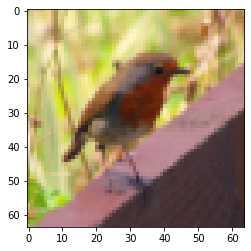

In [90]:
index = 10
plt.imshow(train_x_orig[index])
print('y =', str(train_y[0, index]), '. It is a ', classes[train_y[0,index]].decode('utf-8'), ' picture.')

In [91]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [103]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### 2. Architecture of your model
- 2-layer neural network
- L-layer deep neural network

### 2.1 2-layer neural network


In [104]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
  """
  Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

  Arguments:
  X -- input data, of shape (n_x, number of examples)
  Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
  layers_dims -- dimensions of the layers (n_x, n_h, n_y)
  num_iterations -- number of iterations of the optimization loop
  learning_rate -- learning rate of the gradient descent update rule
  print_cost -- If set to True, this will print the cost every 100 iterations 

  Returns:
  parameters -- a dictionary containing W1, W2, b1, and b2
  """
  
  np.random.seed(1)
  L = len(layers_dims)
  parameters = initialize_parameters_deep(layers_dims)
  costs = []
  caches = []
  
  for iter in range(num_iterations):
      AL, caches = L_model_forward(X, parameters)
      cost = compute_cost(AL, Y)
      grads = L_model_backward(AL, Y, caches)
      parameters = update_parameters(parameters, grads, learning_rate)
  
      if print_cost and iter%100 == 0:
        print ("Cost after iteration %i: %f" %(iter, cost))
        costs.append(cost)
    
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  
  return parameters



Cost after iteration 0: 0.693148
Cost after iteration 100: 0.678011
Cost after iteration 200: 0.667600
Cost after iteration 300: 0.660422
Cost after iteration 400: 0.655458
Cost after iteration 500: 0.652013
Cost after iteration 600: 0.649616
Cost after iteration 700: 0.647942
Cost after iteration 800: 0.646770
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645368
Cost after iteration 1100: 0.644961
Cost after iteration 1200: 0.644673
Cost after iteration 1300: 0.644469
Cost after iteration 1400: 0.644325
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644100
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985


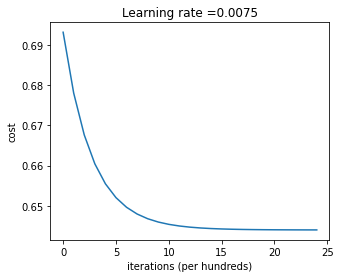

In [105]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)


In [101]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693148
Cost after iteration 100: 0.678011
Cost after iteration 200: 0.667600
Cost after iteration 300: 0.660422
Cost after iteration 400: 0.655458
Cost after iteration 500: 0.652013
Cost after iteration 600: 0.649616
Cost after iteration 700: 0.647942
Cost after iteration 800: 0.646770
Cost after iteration 900: 0.645947
Cost after iteration 1000: 0.645368
Cost after iteration 1100: 0.644961
Cost after iteration 1200: 0.644673
Cost after iteration 1300: 0.644469
Cost after iteration 1400: 0.644325
Cost after iteration 1500: 0.644223
Cost after iteration 1600: 0.644151
Cost after iteration 1700: 0.644100
Cost after iteration 1800: 0.644063
Cost after iteration 1900: 0.644037
Cost after iteration 2000: 0.644019
Cost after iteration 2100: 0.644006
Cost after iteration 2200: 0.643997
Cost after iteration 2300: 0.643990
Cost after iteration 2400: 0.643985


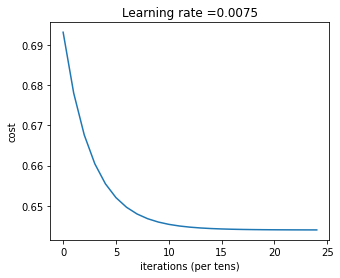

In [102]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)
